###  Add a steady, well-centered picture of your face to a shared folder alongside your classmates.
- Edit your picture to be 256x256 pixels, grayscale (single channel)
- Plot your edited face
- Calculate and plot the average face of the cohort.
- How distant is your face from the average? How would you measure it?

In [1]:
import images
import numpy as np
from PIL import Image
import os
from matrix import svd_approximation
import matplotlib.pyplot as plt
import unsupervised

In [2]:
zone=os.getcwd().replace("\\", "/")+"/" 

In [3]:
rut_my_face=zone + "imagenes/my_face.jpg"   ###  route for  image face


In [4]:
rut_images_class = zone + "imagenes" ### route for class images face

The images, is a library created to solve the exercises from point 2

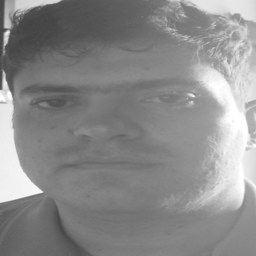

In [5]:
my_face=images.trasnform_one_image(rut_my_face) ### resize and scale my face image 
my_face

In [6]:
class_faces=images.read_and_tranfor_imag(rut_images_class) ## resize and scale images class

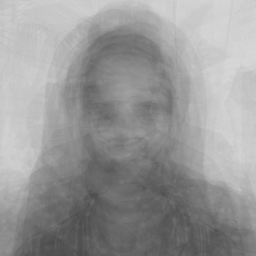

In [7]:
average_face=images.average_imagen(class_faces) ### average class faces
average_face 

In [8]:
distance_between_face_and_average_face=images.my_face_distant(my_face,average_face) ### distance euclidea between my face and average class faces.
distance_between_face_and_average_face

2556.0565330211302

## 4

Apply SVD over the picture of your face, progressively increasing the number of singular values used. Is
there any point where you can say the image is appropriately reproduced? How would you quantify how
different your photo and the approximation are?

for this excersice ,  use my own svd , and compare with aproximation numpy svd

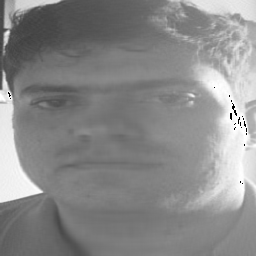

In [9]:
svd_approximation(my_face ,k=50) # this is the numpy aproximation svd with 50 singulars values

Now, let's evaluate different singular values and see what happens as we increase them.

In [10]:
k_values=[2,4,6,8,10,15,20,25,30,40]

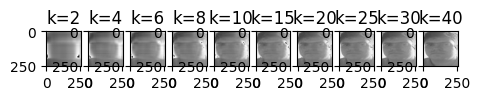

In [11]:
for idx, k in enumerate(k_values, start=2):
    approx_image = svd_approximation(my_face, k)
    plt.subplot(1, len(k_values) + 2, idx)
    plt.imshow(approx_image, cmap='gray')
    plt.title(f'k={k}')

plt.show()

As the singular values increase, the image improves

In [12]:
k_values=[2,15,20,25,30,60,100,150,256]

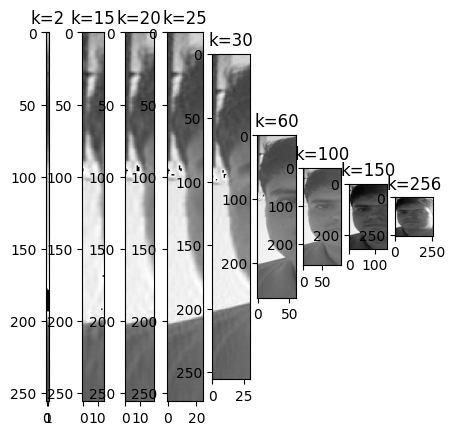

In [13]:
for idx, k in enumerate(k_values, start=2):
    svd = unsupervised.SVD(n_components= k)
    svd.fit(my_face)
    reduced_image = svd.transform(my_face)
    approx_image = svd.inverse_transform(reduced_image, k)
    approx_image = Image.fromarray(np.uint8(approx_image))
    plt.subplot(1, len(k_values) + 2, idx)
    plt.imshow(approx_image, cmap='gray')
    plt.title(f'k={k}')

plt.show()

when the number of singular values is increased, the image is being reconstructed from right to left until the complete image is reconstructed at k=256